<a href="https://www.kaggle.com/code/ankur0907/911-calls-analysis?scriptVersionId=130436291" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read data

In [2]:
df = pd.read_csv('/kaggle/input/montcoalert/911.csv')

# Showing first five data useing head

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# View Shape of DataFrame

In [4]:
df.shape

(663522, 9)

# Showing all the columns 

In [5]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

# Finding all null values columns wise useing isnull().sum()

In [6]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

# There are two columns who have null value (Zip,Title). removeing this rows useing dropna.

In [7]:
df.dropna(subset= ['zip','twp'],inplace = True)

In [8]:
df.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

# Number of Unique value in Title

In [9]:
df['title'].nunique()

144

# Showing all unique values

In [10]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: DIZZINESS',
       'EMS: VEHICLE ACCIDENT', 'Traffic: DISABLED VEHICLE -',
       'Fire: APPLIANCE FIRE', 'EMS: GENERAL WEAKNESS',
       'Fire: CARBON MONOXIDE DETECTOR', 'EMS: UNKNOWN MEDICAL EMERGENCY',
       'EMS: UNRESPONSIVE SUBJECT', 'Fire: VEHICLE ACCIDENT',
       'EMS: CVA/STROKE', 'Fire: FIRE ALARM',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
       'Fire: TRASH/DUMPSTER FIRE',

# Title can divide into three category in new column
# 1:- EMS 
# 2:- Fire
# 3:- Traffic

# Create New columns and store Reason/Department.

In [11]:
df['Reason/Department'] = df['title'].apply(lambda x : x.split(":")[0])

# Showing unique values in Reason/Department

In [12]:
df['Reason/Department'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

# value Count all unique values in Reason/Department

In [13]:
df['Reason/Department'].value_counts()

EMS        304785
Traffic    189597
Fire        88817
Name: Reason/Department, dtype: int64

# Check type of TimeStamp columns

In [14]:
type(df['timeStamp'][0])

str

# It's String so that i Convert timeStamp to datetime formet

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

# Create months, dayofweek, Year, Hours columns

In [17]:
df['Day'] = df['timeStamp'].apply(lambda x : x.dayofweek)
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df['Year'] = df['timeStamp'].apply(lambda x : x.year)
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)

# Showing new columns 

In [18]:
df[['Day','Month','Year','Hour']]

,Day,Month,Year,Hour
0,3,12,2015,17
1,3,12,2015,17
2,3,12,2015,14
3,3,12,2015,16
5,3,12,2015,15
...,...,...,...,...
663517,2,7,2020,15
663518,2,7,2020,15
663519,2,7,2020,15
663520,2,7,2020,15


# Maping day columns to with Day wise like {Mon,Tus,Wed,Thu,Fri,Sat,Sun}

In [19]:
datemap = {0:"Mon",1:'Tus',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day'] = df['Day'].map(datemap)
df['Day']

0         Thu
1         Thu
2         Thu
3         Thu
5         Thu
         ... 
663517    Wed
663518    Wed
663519    Wed
663520    Wed
663521    Wed
Name: Day, Length: 583199, dtype: object

# Count day wise call in Every Category of Reason/Department

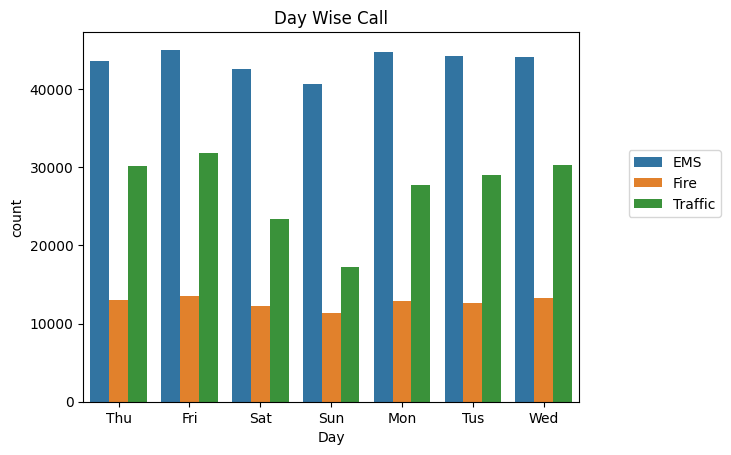

In [20]:
sns.countplot(x='Day',hue = 'Reason/Department',data=df)
plt.title('Day Wise Call')
plt.legend(bbox_to_anchor=(1.3, 0.7))
plt.show()

# Count Months wise call in Every Category of Reason/Department

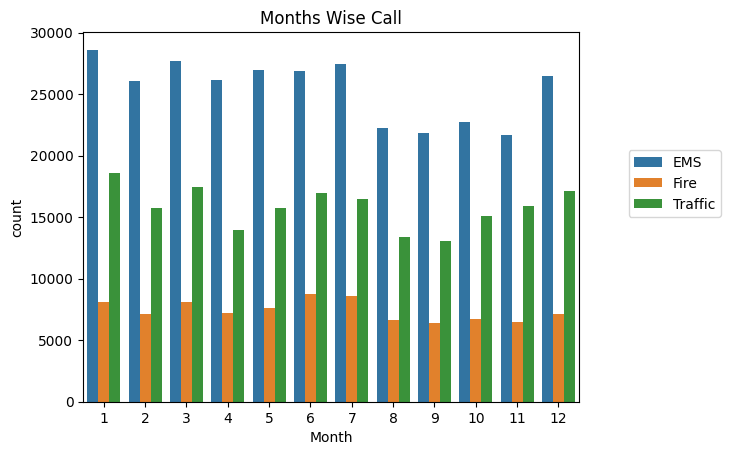

In [21]:
sns.countplot(x='Month',hue = 'Reason/Department',data=df)
plt.title('Months Wise Call')
plt.legend(bbox_to_anchor=(1.3, 0.7))
plt.show()

# Count Year wise call in Every Category of Reason/Department

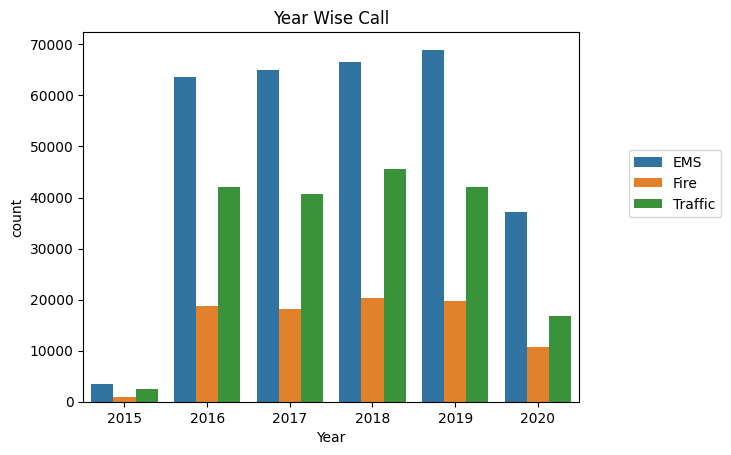

In [22]:
sns.countplot(x='Year',hue = 'Reason/Department',data=df)
plt.title('Year Wise Call')
plt.legend(bbox_to_anchor=(1.3, 0.7))
plt.show()

# Group month column

In [23]:
monthby = df.groupby('Month').count().reset_index()
monthby

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason/Department,Day,Year,Hour
0,1,55282,55282,55282,55282,55282,55282,55282,55282,55282,55282,55282,55282,55282
1,2,48916,48916,48916,48916,48916,48916,48916,48916,48916,48916,48916,48916,48916
2,3,53240,53240,53240,53240,53240,53240,53240,53240,53240,53240,53240,53240,53240
3,4,47344,47344,47344,47344,47344,47344,47344,47344,47344,47344,47344,47344,47344
4,5,50342,50342,50342,50342,50342,50342,50342,50342,50342,50342,50342,50342,50342
5,6,52577,52577,52577,52577,52577,52577,52577,52577,52577,52577,52577,52577,52577
6,7,52491,52491,52491,52491,52491,52491,52491,52491,52491,52491,52491,52491,52491
7,8,42299,42299,42299,42299,42299,42299,42299,42299,42299,42299,42299,42299,42299
8,9,41280,41280,41280,41280,41280,41280,41280,41280,41280,41280,41280,41280,41280
9,10,44576,44576,44576,44576,44576,44576,44576,44576,44576,44576,44576,44576,44576


# Monthly call wise Trend 

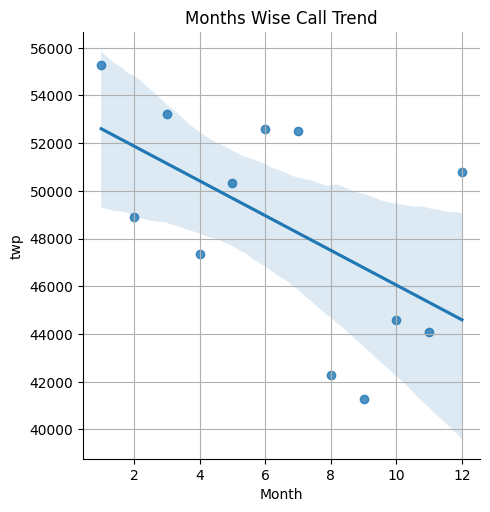

In [24]:
sns.lmplot(x='Month',y ='twp',data=monthby)
plt.grid()
plt.title('Months Wise Call Trend')
plt.show()

# Showing Number of Calls by Day and Hour useing Heatmap

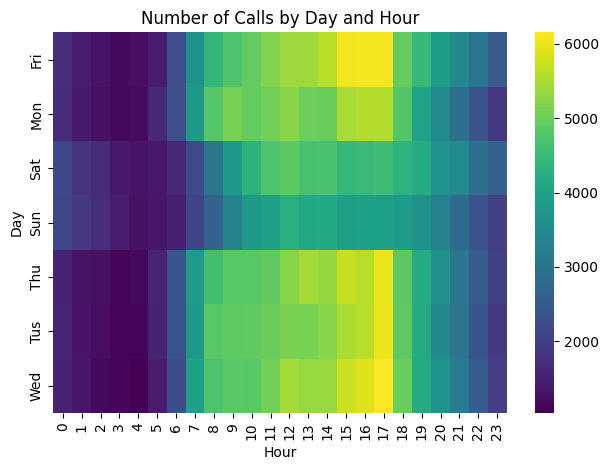

In [25]:
day_by_no_of_call = df.groupby(['Day','Hour'])['Reason/Department'].count().unstack()
sns.heatmap(day_by_no_of_call,cmap = 'viridis')
plt.title('Number of Calls by Day and Hour')
plt.tight_layout()
plt.show()

# Showing Number of Calls by Day and Month

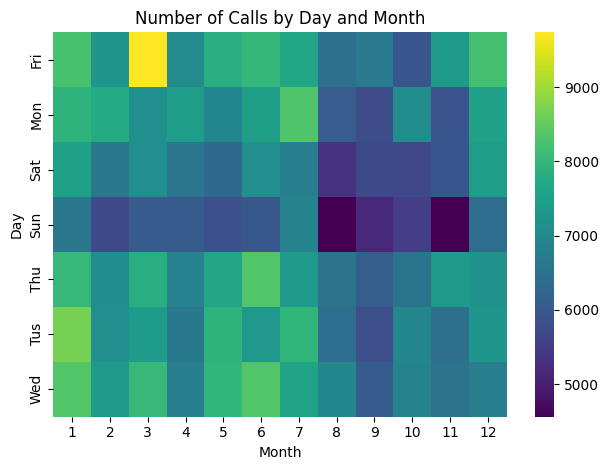

In [26]:
Year = df.groupby(['Day','Month'])['Reason/Department'].count().unstack()
sns.heatmap(Year,cmap = 'viridis')
plt.title("Number of Calls by Day and Month")
plt.tight_layout()
plt.show()

# Canclusion:-
# * Months Wise Call Trend Showing down trend 
# * Year, Months and day Wise Call mostly call for EMS
# * Number of Calls by Hour mostly calling time is 7:00AM to 6:00PM
# * Number of Calls by Day mostly {Mon, Tus, Wed, Thu, Fri}
# * Less number of calls in {Sat,Sun}
# * Number of Calls by Month mostly {Jan,Feb,Mar,Apr,May,Jun,Jul}